In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import tweepy
from tweepy import OAuthHandler

In [24]:
## Set Connection

consumer_key = ${{ secrets.CONSUMER_KEY }}
consumer_secret = ${{ secrets.CONSUMER_SECRET }}
access_token = ${{ secrets.ACCESS_TOKEN }}
access_token_secret = ${{ secrets.ACCESS_TOKEN_SECRET }}

#We have use the about credentials to authenticate the API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [25]:
##To get the tweets in a proper format, first we create a dataframe to store the extracted data.

df = pd.DataFrame(columns = ["Date","User","IsVerified","Tweet","Likes","RT","User_location"])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [26]:
#Function to extract tweets

def get_tweets(Topic, Count):
    i=0
    for tweet in tweepy.Cursor(api.search, q =Topic, count =100, lang ="en", exclude = 'retweets').items():
        print(i, end = '\r')
        df.loc[i,"Date"] =tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i, "Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        #Save as csv
        #df.to_csv("TweetDataset.csv",index =False)
        #Save as excel
        #df.to_excel('{}.xlsx'.format("TweetDataset"),index =False)
        
        i =i+1
        if i>Count :
            break
        else:
            pass

In [28]:
Topic = ["Obama"]
get_tweets(Topic, Count =200)

TweepError: Twitter error response: status code = 401

In [ ]:
df.head(10)

# Preprocessing the Data

In [8]:
#Function to clean the Tweet

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(w+:\/\/\s+)|([RT])|(https://)', ' ',str(tweet).lower()).split())

In [9]:
#Call function to get clean tweets
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))

# Analysing sentiment using Textblob

In [10]:
from textblob import TextBlob

In [11]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity >0 :
        return 'Positive'
    elif analysis.sentiment.polarity ==0 :
        return 'Neutral'
    else :
        return 'Negative'

In [12]:
#Call function to get sentiments
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))

In [13]:
#Summary of a random tweet
n =20
print("Original tweet : \n", df['Tweet'][n])
print()
print("Clean tweet : \n", df['clean_tweet'][n])
print()
print("Sentiment of the tweet : \n", df['Sentiment'][n])

Original tweet : 
 @starless941 @NanbumHall The GOP has policy proposals? Who knew? 

It doesn't matter. Even if they do take back Con… https://t.co/L7K3EJ7U6K

Clean tweet : 
 the gop has policy proposals who knew it doesn t matter even if they do take back con t co l7k3ej7u6k

Sentiment of the tweet : 
 Neutral


In [14]:
df["Sentiment"].value_counts()

Neutral     89
Positive    76
Negative    36
Name: Sentiment, dtype: int64

In [18]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Summary of counts for Total Tweets')

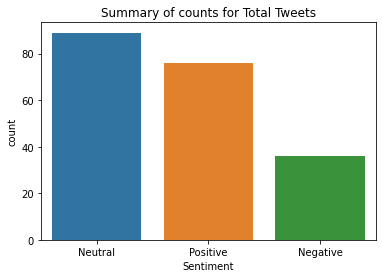

In [19]:
##sns.countplot

sns.countplot(df["Sentiment"])
plt.title("Summary of counts for Total Tweets")

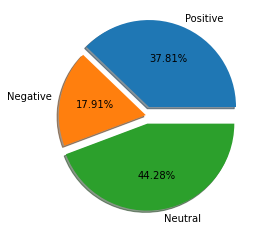

In [20]:
#Pie chart

a=len(df[df["Sentiment"]=="Positive"])
b =len(df[df["Sentiment"]=="Negative"])
c = len(df[df["Sentiment"] == "Neutral"])
d= np.array([a,b,c])
explode = (0.1,0.0,0.1)
plt.pie(d,shadow =True, explode = explode, labels = ["Positive","Negative", "Neutral"],autopct = '%1.2f%%');

Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

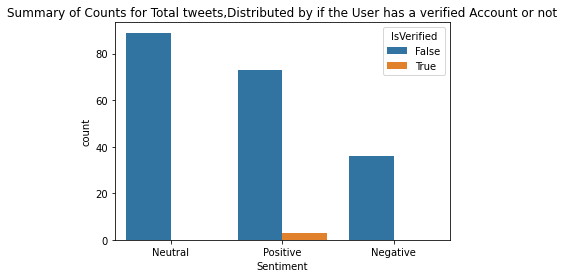

In [21]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")